HERE STARTS THE BASIC INDEXING SCHEME FLOW

In [6]:
# importing necessary modules
from pymongo import MongoClient as mc
#from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import fingerprint_enhancer
from walking import walking, walkonce, checkstable, mergeneighbors
import math

Use mongoclient to retrieve image file paths and use relative paths 

In [9]:
def get_image_paths_and_mv(count):
    # this funciton only return image paths from "Anguli_200k_1M" folder
    main_lst = []
    mvs = []
    paths_list = []
    if(count > 1200000):
        print("input is more-than total images....")
        print("returning 1200000 image paths")
    db_client = mc("10.5.18.101")
    coll = db_client.BI.Anguli_200k_1M
    coll = coll.find({}).limit(count)
    
    for i in coll:
        #if(so_far < count):
        main_lst.append(['../../../19CS91R05/datasets/' + i['path'] , i['mv'] ])
        paths_list.append('../../../19CS91R05/datasets/' + i['path'])
        mvs.append(i['mv'])
    
    return main_lst

In [12]:
get_image_paths_and_mv(3)

[['../../../19CS91R05/datasets/Anguli_200k_1M/Impressions/Impression_3/fp_15/14199.tiff',
  [[148, 76, True, 2.9340964271545906],
   [149, 80, True, -0.3217505543966422],
   [145, 84, True, 2.984990776607778],
   [176, 89, True, 2.770701364777131],
   [223, 110, True, -0.8567056281827387],
   [171, 126, True, -0.5585993153435624],
   [92, 128, True, -2.819842099193151],
   [141, 128, True, 3.0916342578678506],
   [245, 145, True, -1.1309537439791604],
   [204, 147, True, -1.039072259536091],
   [106, 156, True, -2.5829933382462307],
   [60, 168, True, -2.654693421778524],
   [162, 183, True, 2.4668517113662407],
   [83, 190, True, -2.390663591191853],
   [145, 194, True, -2.729182211992406],
   [148, 196, True, -1.941687615607559],
   [142, 199, True, -2.20354516179708],
   [112, 201, True, -2.129395642138459],
   [197, 201, False, -1.7316716039932178],
   [169, 211, True, 1.4141944498128813],
   [225, 222, True, -1.6756732655251305],
   [77, 226, True, -2.701750070774057],
   [97, 247

The following is the test code block for retrieving images

In [68]:
test = get_image_paths_and_mv(5)

test_img_paths = [i[0] for i in test]
test_minutia = [i[1] for i in test]

for i in test_minutia:
    print(i)

# print(type(test_mv))
# print(test_mv[0])
# print(type(test_img_paths))
# print(test_img_paths[0])



[[148, 76, True, 2.9340964271545906], [149, 80, True, -0.3217505543966422], [145, 84, True, 2.984990776607778], [176, 89, True, 2.770701364777131], [223, 110, True, -0.8567056281827387], [171, 126, True, -0.5585993153435624], [92, 128, True, -2.819842099193151], [141, 128, True, 3.0916342578678506], [245, 145, True, -1.1309537439791604], [204, 147, True, -1.039072259536091], [106, 156, True, -2.5829933382462307], [60, 168, True, -2.654693421778524], [162, 183, True, 2.4668517113662407], [83, 190, True, -2.390663591191853], [145, 194, True, -2.729182211992406], [148, 196, True, -1.941687615607559], [142, 199, True, -2.20354516179708], [112, 201, True, -2.129395642138459], [197, 201, False, -1.7316716039932178], [169, 211, True, 1.4141944498128813], [225, 222, True, -1.6756732655251305], [77, 226, True, -2.701750070774057], [97, 247, True, 0.7853981633974483], [148, 252, True, 0.8884797719201485], [214, 260, True, -1.892546881191539], [60, 278, True, 0.5317240672588056], [211, 286, True,

In [67]:
test_minutia

[([148, 76, True, 2.9340964271545906],
  [149, 80, True, -0.3217505543966422],
  [145, 84, True, 2.984990776607778],
  [176, 89, True, 2.770701364777131],
  [223, 110, True, -0.8567056281827387],
  [171, 126, True, -0.5585993153435624],
  [92, 128, True, -2.819842099193151],
  [141, 128, True, 3.0916342578678506],
  [245, 145, True, -1.1309537439791604],
  [204, 147, True, -1.039072259536091],
  [106, 156, True, -2.5829933382462307],
  [60, 168, True, -2.654693421778524],
  [162, 183, True, 2.4668517113662407],
  [83, 190, True, -2.390663591191853],
  [145, 194, True, -2.729182211992406],
  [148, 196, True, -1.941687615607559],
  [142, 199, True, -2.20354516179708],
  [112, 201, True, -2.129395642138459],
  [197, 201, False, -1.7316716039932178],
  [169, 211, True, 1.4141944498128813],
  [225, 222, True, -1.6756732655251305],
  [77, 226, True, -2.701750070774057],
  [97, 247, True, 0.7853981633974483],
  [148, 252, True, 0.8884797719201485],
  [214, 260, True, -1.892546881191539],
  [6

Fingerprint enhancement

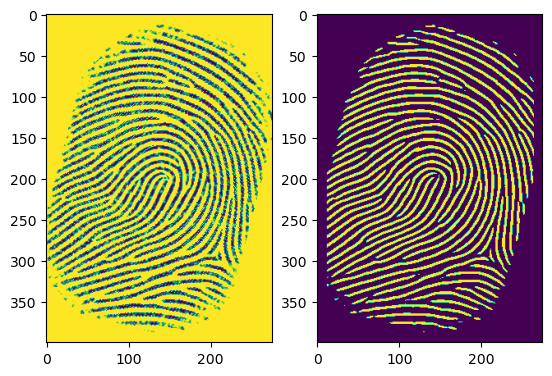

In [25]:
test_img = cv.imread(test_img_paths[0],cv.IMREAD_GRAYSCALE)
en_test_image = fingerprint_enhancer.enhance_Fingerprint(img)
f, ax = plt.subplots(1,2)
ax[0].imshow(test_img)
ax[1].imshow(en_test_image)

Walking algorithm is used to find the signular points

In [22]:
def walk_core2(en_image):
	detect_SP = walking(en_image)
	return detect_SP

VISUALIZATION

In [70]:
import math
# Draw minutiae on the fingerprint
def draw_minutiae(fingerprint, minutiae, termination_color = (255,0,0), bifurcation_color = (0,0,255)):
    # fingerprint = cv.imread(fingerprint_path, cv.IMREAD_GRAYSCALE)
    fingerprint = fingerprint_enhancer.enhance_Fingerprint(fingerprint)
    res = cv.cvtColor(fingerprint, cv.COLOR_GRAY2BGR)
    for x, y, t, *d in minutiae:
        color = termination_color if t else bifurcation_color
        if len(d)==0:
            cv.drawMarker(res, (x,y), color, cv.MARKER_CROSS, 5)
        # else:
        #     cv.drawMarker(res, (x,y), color, cv.MARKER_CROSS, 1)
        else:
            d = d[0]
            ox = int(round(math.cos(d) * 3))
            oy = int(round(math.sin(d) * 3))
            cv.circle(res, (x,y), 2, color, 3, cv.LINE_AA)
            cv.line(res, (x,y), (x+ox,y-oy), color, 3, cv.LINE_AA)        
    return res

def draw_singular_points(fingerprint, detect_SP):
    # fingerprint = cv.imread(fingerprint_path, cv.IMREAD_GRAYSCALE)
    fingerprint = fingerprint_enhancer.enhance_Fingerprint(fingerprint)
    stacked_img = cv.cvtColor(fingerprint, cv.COLOR_GRAY2BGR)
    if min(detect_SP['core'].shape) !=0:
        for i in range(0, detect_SP['core'].shape[0]):
            centre = (int(detect_SP['core'][i,0]), int(detect_SP['core'][i,1]))
            stacked_img = cv.circle(stacked_img, centre, 10, (0,255,255), 2)
    
    if min(detect_SP['delta'].shape) !=0:
        for j in range(0, detect_SP['delta'].shape[0]):
            x = int(detect_SP['delta'][j,0])
            y = int(detect_SP['delta'][j,1])
            pts = np.array([[x,y-10], [x-9,y+5], [x+9,y+5]])
            stacked_img = cv.polylines(stacked_img, [pts], True, (0,255,0), 2)
    
    return stacked_img

def draw_minutiae_and_core_points(fingerprint, minutiae, detect_SP):
    minu = draw_minutiae(fingerprint ,minutiae)
    core = draw_singular_points(fingerprint , detect_SP)
    f, ax = plt.subplots(1,2)
    ax[0].imshow(minu)
    ax[1].imshow(core)

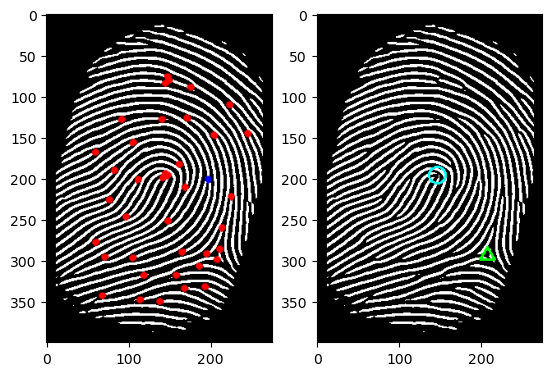

In [71]:
test_singular_point = walk_core2(en_test_image)
draw_minutiae_and_core_points(test_img, test_minutia[0], test_singular_point)


MINUTIA BINARY PATTERN CALCULATION FUNCTION

In [75]:
# Lets check the Minutiae binary pattern

def checkIfPossible(x,y):
    if(x<0 or x>=400):
        return False
    elif(y<0 or y>=275):
        return False
    return True

def GetMinutiaBinaryPattern(minutiae, fingerprint):
    MBP_List = []
    # fingerprint = cv.imread(fingerprint_path, cv.IMREAD_GRAYSCALE)
    for i in minutiae:
        x, y = i[:2]
        window = [[0 for i in range(3)] for j in range(3)]
        
        
        if(checkIfPossible(x-1, y+1)):
            window[0][0] = fingerprint[x-1][y+1]
        if(checkIfPossible(x, y+1)):
            window[0][1] = fingerprint[x][y+1]
        if(checkIfPossible(x+1, y+1)):
            window[0][2] = fingerprint[x+1][y+1]
        if(checkIfPossible(x-1, y)):
            window[1][0] = fingerprint[x-1][y]
        if(checkIfPossible(x, y)):
            window[1][1] = fingerprint[x][y]
        if(checkIfPossible(x+1, y)):
            window[1][2] = fingerprint[x+1][y]
        if(checkIfPossible(x-1, y-1)):
            window[2][0] = fingerprint[x-1][y-1]
        if(checkIfPossible(x, y-1)):
            window[2][1] = fingerprint[x][y-1]
        if(checkIfPossible(x+1, y-1)):
            window[2][2] = fingerprint[x+1][y-1]
        
        temp = []
        
        # direction of MBP vector (0,0) -> (0,1) -> (0,2) -> (1,2) -> (2,2) -> (2,1) -> (2,0) -> (1,0)
        # Hard coding

        temp.append(window[0][0]//255)
        temp.append(window[0][1]//255)
        temp.append(window[0][2]//255)
        temp.append(window[1][2]//255)
        temp.append(window[2][2]//255)
        temp.append(window[2][1]//255)
        temp.append(window[2][0]//255)
        temp.append(window[1][0]//255)
        
        
        # for j in range(3):
        #     for k in range(3):
        #         if(k == 1 and j ==1):
        #             continue
        #         else:
        #             temp.append(window[j][k])
        MBP_List.append(temp)
    return MBP_List

As of now precomputed minutiae vectors are being used

In [73]:
def create_data_frame(lst):
    fingerprint_path, minutia = lst
    # global main_df
    img = cv.imread(fingerprint_path,cv.IMREAD_GRAYSCALE)
    en_image = fingerprint_enhancer.enhance_Fingerprint(img)
    # en_image_bw = cv.cvtColor(en_image, cv.COLOR_GRAY2BGR)
    distance = []
    sectors = []
    try:
        SP = walk_core2(en_image)
    except:
        return
    
    if(min(SP['core'].shape) == 0):
        if min(SP['delta'].shape) == 0:
            # NO Singular Point
            return
        else:
            CorePoint = (int(SP['delta'][0,0]), int(SP['delta'][0,1]))
    else:
        CorePoint = (int(SP['core'][0,0]), int(SP['core'][0,1]))

    for i in minutia:

        dis = ((CorePoint[0] - i[0])**2 + (CorePoint[1] - i[1])**2 )**0.5

        distance.append(dis)

        rads = math.atan2((i[1]- CorePoint[1]), (i[0]- CorePoint[0]))
        
        #if CorePoint[0] == i[0]:
        #    rads = 90
        #else:
        #    rads = math.atan((CorePoint[1] - i[1])/(CorePoint[0] - i[0]))


        degs = math.degrees(rads)
        if degs < 0:
            degs = 360 + degs
        
        sectors.append(int(degs//5 + 1 ))
    
    mbps = GetMinutiaBinaryPattern(minutia, en_image)
    pths = [fingerprint_path for i in range(len(minutia))]
    
    data = {
        "Distance" : distance,
        "Sector" : sectors,
        "MBP" : mbps,
        "Image Path" : pths 
    }
    
    new_df = pd.DataFrame(data)
    
    return new_df



Testing above funciton

In [79]:
i = get_image_paths_and_mv(3)
main_df = pd.DataFrame(columns= ['Distance', 'Sector', 'MBP', 'Image Path'])
#print(main_df)
ans = create_data_frame([i[0][0], i[0][1]])

print(ans)

      Distance  Sector                       MBP  \
0   120.016666      55  [0, 0, 0, 0, 0, 0, 0, 0]   
1   116.038787      55  [0, 0, 1, 0, 0, 0, 0, 0]   
2   112.004464      54  [0, 0, 0, 0, 0, 0, 0, 0]   
3   111.126055      58  [1, 1, 1, 1, 1, 0, 0, 0]   
4   115.433964      63  [0, 0, 0, 0, 0, 1, 1, 1]   
5    74.330344      58  [0, 0, 1, 1, 0, 0, 0, 0]   
6    86.833173      47  [1, 0, 0, 0, 0, 0, 1, 1]   
7    68.183576      54  [0, 0, 0, 0, 0, 0, 0, 0]   
8   111.364267      67  [1, 1, 1, 1, 1, 1, 1, 1]   
9    75.927597      64  [0, 0, 0, 0, 1, 1, 1, 1]   
10   56.568542      46  [0, 0, 0, 0, 0, 0, 0, 0]   
11   90.443352      40  [0, 0, 0, 0, 0, 0, 0, 0]   
12   20.615528      65  [1, 0, 0, 0, 0, 0, 0, 0]   
13   63.285069      38  [0, 0, 0, 0, 0, 0, 0, 0]   
14    2.236068      49  [1, 1, 1, 1, 0, 0, 1, 1]   
15    2.000000       1  [1, 1, 1, 1, 0, 1, 1, 1]   
16    5.000000      29  [0, 0, 0, 0, 0, 0, 0, 0]   
17   34.365681      35  [0, 1, 1, 1, 1, 1, 1, 1]   
18   51.2445

CREATING INDEX SPACE FOR 1000 IMAGES USING PARALLEL PROGRAMMING

In [14]:
from multiprocessing import Pool
main_df = pd.DataFrame(columns= ['Distance', 'Sector', 'MBP', 'Image Path'])
lst = get_image_paths_and_mv(1000)
with Pool(10) as P:
    ans = P.map(create_data_frame, lst)

In [15]:
ans[0]

,Distance,Sector,MBP,Image Path
0,120.016666,55,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
1,116.038787,55,"[0, 0, 1, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
2,112.004464,54,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
3,111.126055,58,"[1, 1, 1, 1, 1, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
4,115.433964,63,"[0, 0, 0, 0, 0, 1, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
5,74.330344,58,"[0, 0, 1, 1, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
6,86.833173,47,"[1, 0, 0, 0, 0, 0, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
7,68.183576,54,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
8,111.364267,67,"[1, 1, 1, 1, 1, 1, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
9,75.927597,64,"[0, 0, 0, 0, 1, 1, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...


In [16]:
con = pd.concat(ans, ignore_index=True)
con.to_csv('index_space1.csv')
con

,Distance,Sector,MBP,Image Path
0,120.016666,55,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
1,116.038787,55,"[0, 0, 1, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
2,112.004464,54,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
3,111.126055,58,"[1, 1, 1, 1, 1, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
4,115.433964,63,"[0, 0, 0, 0, 0, 1, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
...,...,...,...,...
78745,157.165518,22,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78746,158.823802,17,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78747,158.202402,19,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78748,160.252925,18,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...


In [80]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current
path1 = r"../../../19CS91R05/datasets/Anguli_200k_1M/Impressions/Impression_3/fp_15/14772.tiff"
path2 = r"../../../19CS91R05/datasets/Anguli_200k_1M/Impressions/Impression_1/fp_15/14772.tiff"

client = MongoClient('mongodb://10.5.18.101/')
filter1={
    'path': 'Anguli_200k_1M/Impressions/Impression_3/fp_15/14772.tiff'
}
filter2={
    'path': 'Anguli_200k_1M/Impressions/Impression_1/fp_15/14772.tiff'
}

db_img1 = client['BI']['Anguli_200k_1M'].find_one(
  filter=filter1
)

db_img2 = client['BI']['Anguli_200k_1M'].find_one(
  filter=filter2
)
mv1 = db_img1['mv']
mv2 = db_img2['mv']
img1 = cv.imread(path1, cv.IMREAD_GRAYSCALE)
img1 = fingerprint_enhancer.enhance_Fingerprint(img1)
img2 = cv.imread(path2, cv.IMREAD_GRAYSCALE)
img2 = fingerprint_enhancer.enhance_Fingerprint(img2)
detectSP1 = walk_core2(img1)
detectSP2 = walk_core2(img2)

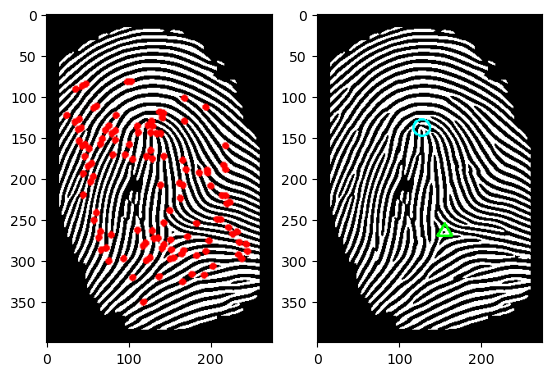

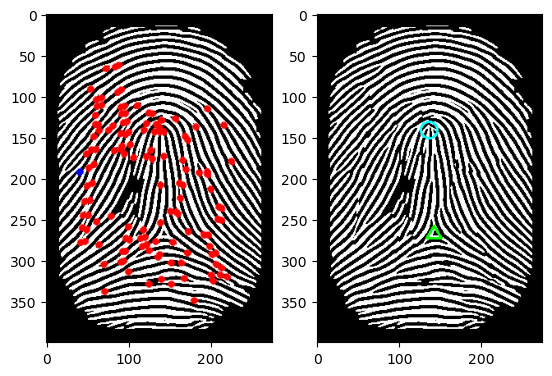

In [81]:
draw_minutiae_and_core_points(img2, mv2, detectSP2)
draw_minutiae_and_core_points(img1, mv1, detectSP1)

In [13]:
img1_space = create_data_frame([path1, mv1])
img2_space = create_data_frame([path2, mv2])

img1_space.to_csv('check3.csv')
img2_space.to_csv('check4.csv')

In [14]:
main_df = pd.read_csv('index_space1.csv')
sort_main_df = main_df.sort_values(by=['Distance', 'Sector'], ascending=[True, True], ignore_index= True)
sort_main_df = sort_main_df[['Distance', 'Sector', 'MBP', 'Image Path']]
sort_main_df.to_csv('sort_main_df.csv')
sort_main_df

,Distance,Sector,MBP,Image Path
0,0.000000,1,"[0, 0, 0, 0, 1, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
1,0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
2,0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
3,0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
4,0.000000,1,"[1, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
...,...,...,...,...
78745,247.759964,67,"[1, 0, 0, 0, 0, 0, 1, 1]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78746,247.879003,57,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78747,256.727482,63,"[0, 0, 0, 0, 1, 1, 1, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...
78748,261.038311,63,"[1, 1, 1, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...


In [17]:
check2 = pd.read_csv('check4.csv')

list_of_dfs = []
list_of_rows = []
lambda_hamming = lambda mbp, realmbp : sum([1 if mbp[i]==realmbp[i] else 0 for i in range(8) ])


for idx,row in check2.iterrows():
    dis = row['Distance']
    sec = row['Sector']
    MBP = row['MBP']
    def hamming_dis(mbp):
        count = 0
        for i in range(8):
            if(mbp[i] == MBP[i]):
                count += 1
        # return True if count > 3 else False
        return count
    list_of_rows.append([dis, sec, MBP])
    right_rows = sort_main_df[(abs(sort_main_df['Distance'] - dis) <=1) & (sort_main_df['Sector'] == sec)]
    right_rows['NEW_MBP'] = right_rows['MBP'].apply(hamming_dis, 'columns')
    right_rows = right_rows[right_rows['NEW_MBP'] > 3]
    list_of_dfs.append(right_rows)
    
global_right_rows = right_rows


/tmp/ipykernel_26715/2727100769.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_rows['NEW_MBP'] = right_rows['MBP'].apply(hamming_dis, 'columns')
/tmp/ipykernel_26715/2727100769.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_rows['NEW_MBP'] = right_rows['MBP'].apply(hamming_dis, 'columns')
/tmp/ipykernel_26715/2727100769.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [16]:
global_right_rows

,Distance,Sector,MBP,Image Path,NEW_MBP
72979,153.052279,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
72987,153.055545,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73003,153.169840,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73004,153.169840,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73005,153.169840,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73027,153.287312,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73037,153.375357,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73047,153.394915,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73087,153.525242,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
73101,153.587109,21,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8


In [18]:
list_of_dfs[0]

,Distance,Sector,MBP,Image Path,NEW_MBP
65375,129.769026,50,"[0, 0, 0, 0, 1, 1, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
65376,129.769026,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
65456,130.000000,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
65768,130.678996,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
66018,131.308796,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
66019,131.308796,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
66020,131.308796,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
66073,131.472431,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8
66142,131.590273,50,"[0, 0, 0, 0, 0, 0, 0, 0]",../../../19CS91R05/datasets/Anguli_200k_1M/Imp...,8


In [19]:
list_of_rows[-1]

[154.02921800749365, 21, '[0, 0, 0, 0, 0, 0, 0, 0]']

In [39]:
print(lambda_hamming([1, 0, 0, 0, 0, 0, 1, 1], 	[0, 1, 1, 1, 1, 1, 1, 1]))
print('[0, 1, 1, 1, 1, 1, 1, 1]')
print('[1, 0, 0, 0, 0, 0, 1, 1]')


2
[0, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 1]


In [20]:
fss = pd.concat(list_of_dfs)
fss.to_csv('final_search_space_2.csv')